<a href="https://colab.research.google.com/github/ironhide554/Crop-Disease-Prediction/blob/main/ResNet50_completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/train.zip", "r")
zip_ref.extractall("/content")
zip_ref.close()

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/valid.zip", "r")
zip_ref.extractall("/content")
zip_ref.close()

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/test.zip", "r")
zip_ref.extractall("/content")
zip_ref.close()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import PIL

import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img,img_to_array
from keras.applications import imagenet_utils
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras import models , layers
from tensorflow.keras.models import save_model

In [ ]:
IMAGE_SIZE = 224
BATCH_SIZE = 32
CHANNEL = 3
EPOCHS = 50

In [ ]:
train_datagen = ImageDataGenerator(zoom_range = 0.5 , shear_range=0.3 , horizontal_flip = True , preprocessing_function = preprocess_input )

valid_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

train_ds = train_datagen.flow_from_directory(directory= "/content/train", target_size=(224 , 224) , batch_size=32,color_mode='rgb',class_mode='categorical',seed=42)
valid_ds = valid_datagen.flow_from_directory(directory="/content/valid" , target_size=(224 , 224) , batch_size=32,color_mode='rgb',class_mode='categorical')


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory('/content/test',
                                                              shuffle = True,
                                                              image_size = (224 , 224),
                                                              batch_size = 32
                                                        )


Found 1812 files belonging to 38 classes.


In [ ]:
#building our model

from keras.layers import Dense , Flatten  , Activation, GlobalAveragePooling2D, Input
from keras.models import Model
import keras

base_model = tf.keras.applications.ResNet50(input_shape=(224 , 224 , 3) , include_top=False)

for layer in base_model.layers:
  layer.trainable = False

pt=Input(shape=(224,224,3))
func=tf.cast(pt,tf.float32)
x=preprocess_input(func) #This function used to zero-center each color channel wrt Imagenet dataset
model_resnet=base_model(x,training=False)
model_resnet=GlobalAveragePooling2D()(model_resnet)
model_resnet=Dense(128,activation='relu')(model_resnet)
model_resnet=Dense(64,activation='relu')(model_resnet)
model_resnet=Dense(38,activation='softmax')(model_resnet)


model_main=Model(inputs=pt,outputs=model_resnet)
model_main.summary()

base_model.summary()
model_main.compile(optimizer = "adam" , loss = keras.losses._categorical_crossentropy , metrics = ["accuracy"])

#Early Stopping and Model checkpoint


from keras.callbacks import ModelCheckpoint , EarlyStopping,ReduceLROnPlateau
from tensorflow.keras import callbacks, layers,Model
es=EarlyStopping(monitor='val_accuracy',verbose=1,patience=7,mode='auto')
mc=ModelCheckpoint(filepath='/content',monitor='val_accuracy',verbose=1,save_best_only=True)
lr=ReduceLROnPlateau(monitor='val_accuracy',verbose=1,patience=5,min_lr=0.001)

cb=[es , mc ,lr]







Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.cast_3 (TFOpLambda)      (None, 224, 224, 3)       0         
                                                                 
 tf.__operators__.getitem_3  (None, 224, 224, 3)       0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_3 (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_2  (None, 2048)              0   

AttributeError: ignored

In [ ]:
his = model_main.fit(train_ds , steps_per_epoch = 200 , epochs = 30 , verbose = 1 , validation_data = valid_ds , validation_steps=16 ,callbacks = cb)


In [ ]:
from tensorflow.keras import Model
from keras.models import load_model
model = load_model('/content/drive/MyDrive/models/renetmodel.h5')

In [ ]:
scores = model.evaluate(test_ds)

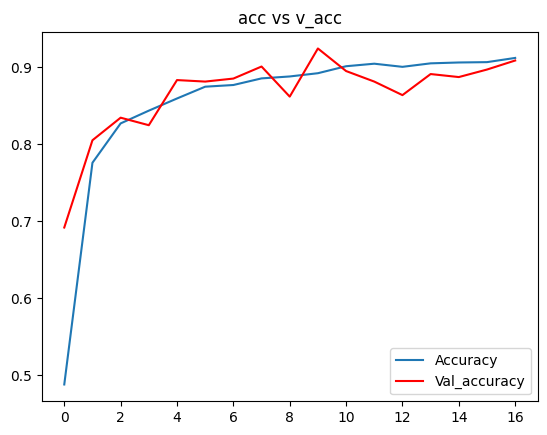

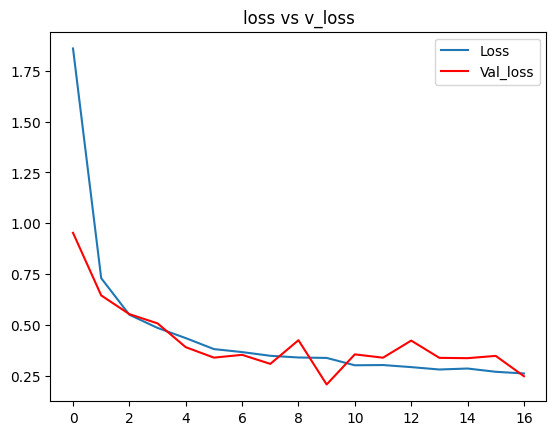

In [ ]:
h = his.history
h.keys()

plt.plot(h["accuracy"] , label = "Accuracy")
plt.plot(h["val_accuracy"] , c="red", label = "Val_accuracy")
plt.legend()
plt.title("acc vs v_acc")
plt.show()

plt.plot(h["loss"] , label = "Loss")
plt.plot(h["val_loss"] , c="red" , label = "Val_loss")
plt.legend()
plt.title("loss vs v_loss")
plt.show()




In [ ]:
from tensorflow.keras.utils import load_img,img_to_array
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input

path = "/content/test/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)/0b19e488-1361-49b9-a5bc-b47d5bd8207c___FAM_L.Blight 4587.JPG"
img = load_img(path , target_size = (224,224,3))

img = img_to_array(img)
img_batch = np.expand_dims(img, axis = 0)
img_batch = preprocess_input(img_batch)
img.shape





(224, 224, 3)

In [ ]:
from tensorflow.keras import Model
from keras.models import load_model
model = load_model('/content/drive/MyDrive/models/renetmodel.h5')

In [ ]:
predict = model.predict(img_batch)

class_mapping = {
    0: 'Apple Scab',
    1: 'Apple Black Rot',
    2: 'Apple Rust',
    3: 'Apple Healthy',
    4: 'Blueberry Healthy',
    5: 'Cherry (including sour) Powdery mildew',
    6: 'Cherry (including sour) healthy',
    7: 'Corn (maize) Cercospora leaf spot Gray leaf spot',
    8: 'Corn (maize) Common rust',
    9: 'Corn (maize) Northern Leaf Blight',
    10: 'Corn (maize) Healthy',
    11: 'Grape Black Rot',
    12: 'Grape Esca (Black Measles)',
    13: 'Grape Leaf blight (Isariopsis Leaf Spot)',
    14: 'Grape Healthy',
    15: 'Orange Haunglongbing (Citrus greening)',
    16: 'Peach Bacterial Spot',
    17: 'Peach Healthy',
    18: 'Pepper Bell Bacterial Spot',
    19: 'Pepper Bell Healthy',
    20: 'Potato Early Blight',
    21: 'Potato Late Blight',
    22: 'Potato Healthy',
    23: 'Raspberry Healthy',
    24: 'Soyabean Healthy',
    25: 'Squash Powdery Mildew',
    26: 'Strawberry Leaf Scorch',
    27: 'Strawberry Healthy',
    28: 'Tomato Bacterial Spot',
    29: 'Tomato Early Blight',
    30: 'Tomato Late Blight',
    31: 'Tomato Leaf Mold',
    32: 'Tomato Septoria leaf spot',
    33: 'Tomato Spider mites Two-spotted spider mite',
    34: 'Tomato Target Spot',
    35: 'Tomato Tomato Yellow Leaf Curl Virus',
    36: 'Tomato Tomato mosaic virus',
    37: 'Tomato Healthy',
    38: 'None',
    }


1/1 [==============================] - 0s 27ms/step


In [ ]:
predicted_class_index = np.argmax(predict)
predicted_disease_class = class_mapping.get(predicted_class_index , "unknown")
print("Predicted Disease Class:" , predicted_disease_class)

Predicted Disease Class: Grape Leaf blight (Isariopsis Leaf Spot)


In [ ]:

y_predicted = ['Cherry (including sour) Powdery mildew', 'Blueberry Healthy', 'Orange Haunglongbing (Citrus greening)', 'Grape Healthy','Grape Black Rot', 'Cherry (including sour) healthy']

print(y_predicted)

['Cherry (including sour) Powdery mildew', 'Blueberry Healthy', 'Orange Haunglongbing (Citrus greening)', 'Grape Healthy', 'Grape Black Rot', 'Cherry (including sour) healthy', 'Grape Leaf blight (Isariopsis Leaf Spot)']


In [ ]:
y_predicted.append(predicted_disease_class)